In [92]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [93]:
dataset_color = ["#4194cb", "#46a2da", "#58afdd", "6abce2", "8dcfec", "#b8e2f4"] + [
    "#99648a",
    "#ae83a1",
    "#c2a2b9",
    "#d6c1d0",
]
dataset_color = ["#8FB081", "#9AB98E", "#A5C29B", "#B0CBA8", "#BBD4B5", "#C6DDC2"] + [
    "#99648a",
    "#ae83a1",
    "#c2a2b9",
    "#d6c1d0",
]
dataset_color = ["#FFCC98", "#FFD3A6", "#FFDBB5", "#FFE2C3", "#FFE9D2", "#FFF1E0"] + [
    "#99648a",
    "#ae83a1",
    "#c2a2b9",
    "#d6c1d0",
]

dataset_info = {
    "CXP": {
        "task": "diagnosis",
        "size": 223414 + 234,
        "modality": "Chest X-ray",
        "modality-corase": "Radiology",
        "color": dataset_color[0],
    },
    "Camelyon": {
        "task": "diagnosis",
        "size": 3680 + 920,
        "modality": "Pathology",
        "modality-corase": "Pathology",
        "color": dataset_color[1],
    },
    "HAM": {
        "task": "diagnosis",
        "size": 8137 + 1811,
        "modality": "Dermatology",
        "modality-corase": "Dermatology",
        "color": dataset_color[2],
    },
    "PAPILA": {
        "task": "diagnosis",
        "size": 364 + 56,
        "modality": "Color Fundus",
        "modality-corase": "Ophthalmology",
        "color": dataset_color[3],
    },
    "GF3300": {
        "task": "diagnosis",
        "size": 2706 + 594,
        "modality": "OCT RNFLT",
        "modality-corase": "Ophthalmology",
        "color": dataset_color[4],
    },
    "FairVLMed-diag": {
        "task": "diagnosis",
        "size": 10000,
        "modality": "SLO Fundus",
        "modality-corase": "Ophthalmology",
        "color": dataset_color[5],
    },
    "SLAKE": {
        "task": "vqa",
        "size": 1061 + 4919,
        "modality": "Radiology",
        "modality-corase": "Radiology",
        "color": dataset_color[6],
    },
    "PathVQA": {
        "task": "vqa",
        "size": 6719 + 19654,
        "modality": "Pathology",
        "modality-corase": "Pathology",
        "color": dataset_color[7],
    },
    "VQA-RAD": {
        "task": "vqa",
        "size": 451 + 1793,
        "modality": "Radiology",
        "modality-corase": "Radiology",
        "color": dataset_color[8],
    },
    "FairVLMed-vqa": {
        "task": "vqa",
        "size": 3994 + 14000,
        "modality": "SLO Fundus",
        "modality-corase": "Ophthalmology",
        "color": dataset_color[9],
    },
}

dataset_info

{'CXP': {'task': 'diagnosis',
  'size': 223648,
  'modality': 'Chest X-ray',
  'modality-corase': 'Radiology',
  'color': '#FFCC98'},
 'Camelyon': {'task': 'diagnosis',
  'size': 4600,
  'modality': 'Pathology',
  'modality-corase': 'Pathology',
  'color': '#FFD3A6'},
 'HAM': {'task': 'diagnosis',
  'size': 9948,
  'modality': 'Dermatology',
  'modality-corase': 'Dermatology',
  'color': '#FFDBB5'},
 'PAPILA': {'task': 'diagnosis',
  'size': 420,
  'modality': 'Color Fundus',
  'modality-corase': 'Ophthalmology',
  'color': '#FFE2C3'},
 'GF3300': {'task': 'diagnosis',
  'size': 3300,
  'modality': 'OCT RNFLT',
  'modality-corase': 'Ophthalmology',
  'color': '#FFE9D2'},
 'FairVLMed-diag': {'task': 'diagnosis',
  'size': 10000,
  'modality': 'SLO Fundus',
  'modality-corase': 'Ophthalmology',
  'color': '#FFF1E0'},
 'SLAKE': {'task': 'vqa',
  'size': 5980,
  'modality': 'Radiology',
  'modality-corase': 'Radiology',
  'color': '#99648a'},
 'PathVQA': {'task': 'vqa',
  'size': 26373,
  '

In [94]:
def retrive_task_datasets(task="all"):
    datasets = []
    sample_sizes = []
    modalities = []

    for k, v in dataset_info.items():
        if task != "all" and v["task"] != task:
            continue

        datasets.append(k)
        sample_sizes.append(v["size"])
        modalities.append(v["modality-corase"])

    sort_indices = np.argsort(sample_sizes)[::-1]

    datasets = np.array(datasets)[sort_indices]
    sample_sizes = np.array(sample_sizes)[sort_indices]
    modalities = np.array(modalities)[sort_indices]

    return datasets, sample_sizes, modalities

In [95]:
colors = ["#139ed3", "#ffd700", "#92d050", "#ff0000", "#947ff2", "#dd8b57"]
colors = ["#B1D4E0", "#FBE7C6", "#d1b6d1", "#B1D8B7", "#FFAEBC", "#A47551"]


def plot_pie(ax, datasets, sample_sizes, modalities, do_exploe=False):
    if do_exploe:
        explode = [
            0.1 if s == max(sample_sizes) else 0.1 if s / sum(sample_sizes) <= 0.04 else 0.01 for s in sample_sizes
        ]
    else:
        explode = [
            0.01 if s == max(sample_sizes) else 0.1 if s / sum(sample_sizes) <= 0.04 else 0.01 for s in sample_sizes
        ]

    total = sum(sample_sizes)

    ax.pie(
        sample_sizes,
        labels=datasets,
        # autopct=lambda p: f"{int(total*p/100.0)} ({p:.1f})%",
        explode=explode,
        startangle=180,
        radius=1,
        colors=colors,
    )
    ax.axis("equal")

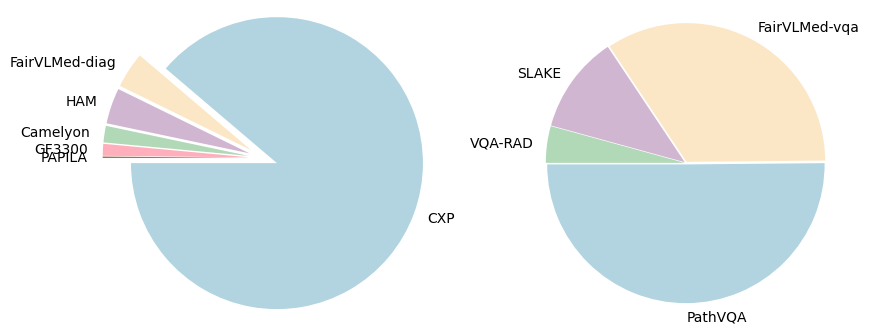

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

datasets_diag, sample_sizes_diag, modalities_diag = retrive_task_datasets(task="diagnosis")
plot_pie(axes[0], datasets_diag, sample_sizes_diag, modalities_diag, do_exploe=True)
datasets, sample_sizes, modalities = retrive_task_datasets(task="vqa")
plot_pie(axes[1], datasets, sample_sizes, modalities)

plt.savefig(
    "heatmap/data_pie.png",
    dpi=1000,
    bbox_inches="tight",
)

# axes[1].bar(datasets, sample_sizes)

In [97]:
modalities_all = np.concat([modalities, modalities_diag])
datasets_all = np.concat([datasets, datasets_diag])
sample_sizes_all = np.concat([sample_sizes, sample_sizes_diag])
# colors_all = [dataset_info[x]["color"] for x in datasets_all]

In [98]:
dataset_color_map = {}
for k, v in dataset_info.items():
    dataset_color_map[k] = v["color"]

In [100]:
df = pd.DataFrame(dict(modality=modalities_all, dataset=datasets_all, sample_size=sample_sizes_all))

fig = px.sunburst(
    df,
    path=[
        "modality",
        "dataset",
    ],
    values="sample_size",
    color="dataset",
    color_discrete_map=dataset_color_map,
    # branchvalues="total",
)
labels = list(fig.data[0].labels)
parents = list(fig.data[0].parents)

# Identify Level1 nodes (those whose parent is root: "" or None)
level1_idx = [i for i, p in enumerate(parents) if p in ("", None)]

# Define your desired colors for Level1 (first ancestor)
# level1_color_map = {
#     "Radiology": "#ffcc99",
#     "Pathology": "#c5e4b4",
#     "Dermatology": "#d1a594",
#     "Ophthalmology": "#f1a3a3",
# }
gray_clor = "#e7e7e7"
level1_color_map = {
    "Radiology": gray_clor,
    "Pathology": gray_clor,
    "Dermatology": gray_clor,
    "Ophthalmology": gray_clor,
}

# Start from current colors (for Level2 already set by color_discrete_map)
colors = list(fig.data[0].marker.colors)

# Overwrite Level1 node colors
for i in level1_idx:
    name = labels[i]
    colors[i] = level1_color_map.get(name, "#7f7f7f")  # fallback if missing

fig.data[0].marker.colors = colors

fig.update_traces(
    textinfo="none",
)  # 显示标签和相对根的百分比
fig.update_traces(
    hovertemplate=(
        "%{label}<br>"
        "Value=%{value}<br>"
        "Parent Share=%{percentParent:.2%}<br>"  # 两位小数百分比
        "Root Share=%{percentRoot:.2%}<extra></extra>"
    )
)
# fig.update_traces(textinfo="label+percent root")  # 显示标签和相对根的百分比
fig.write_image("heatmap/dataset_pie.pdf")
fig.show()

In [222]:
fig.data[0].parents

array(['', '', '', 'Radiology', 'Pathology', 'Ophthalmology',
       'Ophthalmology', 'Ophthalmology', 'Dermatology', '',
       'Ophthalmology', 'Pathology', 'Radiology', 'Radiology'],
      dtype=object)

In [144]:
datasets_diag

array(['CXP', 'FairVLMed-diag', 'HAM', 'Camelyon', 'GF3300', 'PAPILA'],
      dtype='<U14')

In [146]:
sample_sizes_diag

array([223648,  10000,   9948,   4600,   3300,    420])

In [9]:
import plotly.express as px
import pandas as pd

# 示例层级：Region > Country > City
data = [
    ["World", "Asia", None, 100],
    ["Asia", "China", None, 60],
    ["Asia", "Japan", None, 40],
    ["China", "Beijing", None, 25],
    ["China", "Shanghai", None, 35],
    ["Japan", "Tokyo", None, 30],
    ["Japan", "Osaka", None, 10],
]
# Plotly sunburst 需要每个节点的label、父节点、以及数值；根节点父亲为空
df = pd.DataFrame(data, columns=["parent", "label", "dummy", "value"])

fig = px.sunburst(
    df,
    names="label",
    parents="parent",
    values="value",
    color="parent",  # 可选：按父类着色
    branchvalues="total",  # 子值之和等于父值（常用）。另有'remainder'
)
fig.update_traces(textinfo="label+percent root")  # 显示标签和相对根的百分比
fig.update_layout(margin=dict(t=20, l=20, r=20, b=20))
fig.show()

In [12]:
df = pd.DataFrame(
    dict(modality=modalities, dataset=datasets, sample_size=sample_sizes))
fig = px.sunburst(
    df,
    path=[
        "modality",
        "dataset",
    ],
    values="sample_size",
)
fig.show()